In [1]:
# Import modules

import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Do not display warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data
df_train = pd.read_csv('/Users/tifanionibala/Desktop/Datasets/HR Analytics_DS Job/aug_train.csv')
df_test = pd.read_csv('/Users/tifanionibala/Desktop/Datasets/HR Analytics_DS Job/aug_test.csv')

In [3]:
df_train.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [4]:
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Preparing the Data

From the info above only 4 out of 14 features are numbers, the rest is categorical. Most machine learning prefer to work with numbers, so we need to convert categorical attributes into numbers.

Before we do so, we have to check if there is any duplicate row or missing value. 

In [6]:
# Check duplicated row
print('Train data:\n'.strip(), df_train[df_train.duplicated()])
print()
print('Test data:\n'.strip(), df_test[df_test.duplicated()])

Train data: Empty DataFrame
Columns: [enrollee_id, city, city_development_index, gender, relevent_experience, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new_job, training_hours, target]
Index: []

Test data: Empty DataFrame
Columns: [enrollee_id, city, city_development_index, gender, relevent_experience, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new_job, training_hours]
Index: []


There is no duplicate row in our dataset.

In [7]:
# Check missing values
df_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [8]:
df_test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

As we can see there are many missing values in this dataframe.

We will fill the missing values, but we need some insights to decide which method we will use.

In [9]:
df_cat = ['gender', 'enrolled_university', 'education_level',
          'major_discipline','experience', 'company_size',
          'company_type', 'last_new_job'] # Categorical columns that have missing values

def count_frequency(data):
    for col in df_cat:
        x = data[col].value_counts() # To find the unique value counts of each variable
        print(x)
        print()

In [10]:
count_frequency(df_train) # Apply function to train data

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, 

In [11]:
count_frequency(df_test) # Apply function to test data

Male      1460
Female     137
Other       24
Name: gender, dtype: int64

no_enrollment       1519
Full time course     435
Part time course     144
Name: enrolled_university, dtype: int64

Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: education_level, dtype: int64

STEM               1621
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
Name: major_discipline, dtype: int64

>20    383
5      163
3      154
4      145
6      130
2      128
7      116
9      113
10      96
11      86
8       82
<1      74
16      68
15      59
1       56
14      55
13      54
12      52
17      36
19      29
18      26
20      19
Name: experience, dtype: int64

50-99        338
100-500      318
10000+       217
10/49        172
<10          163
1000-4999    143
500-999       88
5000-9999     68
Name: company_size, dtype: int64

Pvt Ltd                1141
Publi

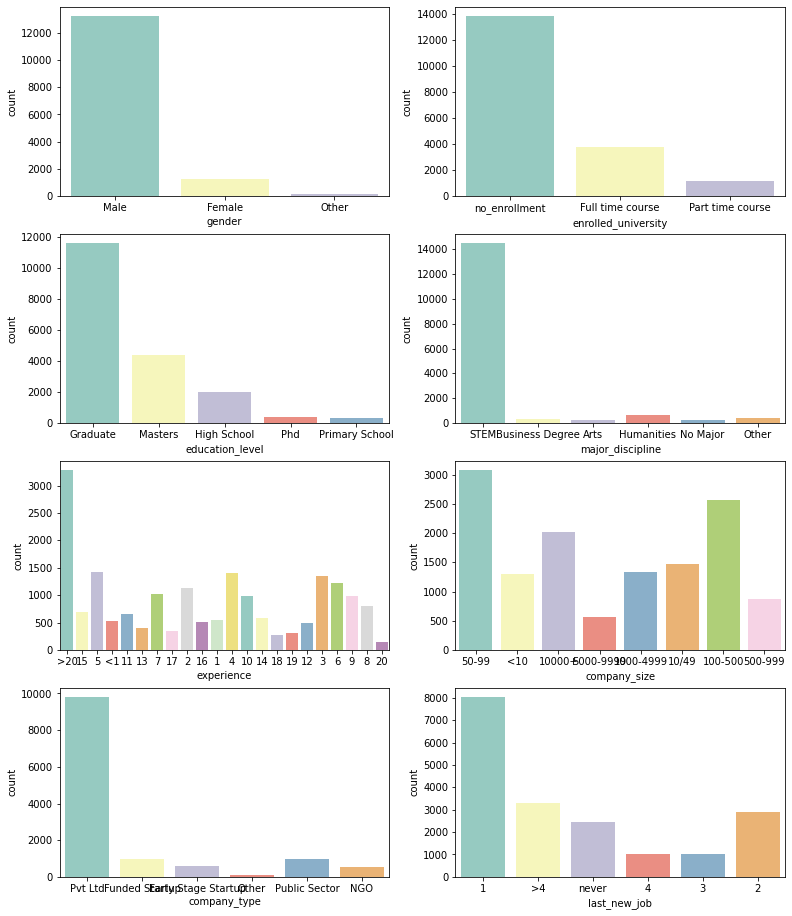

In [12]:
# Visualize unique values

a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,16))

for col in df_cat:
    plt.subplot(a, b, c)
    plt.xlabel(col)
    sns.countplot(df_train[col], palette='Set3')
    c = c + 1

plt.show()

Each variable has a category that has significant differences with the other categories, except 'company_size'. E.g. majority of enrolee in this dataset is male, so we will fill missing values in 'gender' with Male.

Imputing techniques will be used:
1. Use mode() for 'gender', 'enrolled_university', 'education_level','major_discipline', 'experience', 'company_type', 'last_new_job'. Impute NaN values with the most frequent value in each column.

2. Use ffill() function for 'company_size'. ‘ffill’ stands for ‘forward fill’ and will propagate last valid value forward.

In [13]:
df_train[df_cat].describe() # Make sure NaN value is not the mode of this dataframe

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,14650,18772,18698,16345,19093,13220,13018,18735
unique,3,3,5,6,22,8,6,6
top,Male,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,13221,13817,11598,14492,3286,3083,9817,8040


In [14]:
#1. Impute missing values with the most frequent values

cols_mode = ['gender', 'enrolled_university', 'education_level',
             'major_discipline', 'experience', 'company_type', 'last_new_job']

df_train[cols_mode] = df_train[cols_mode].fillna(df_train.mode().iloc[0])
df_test[cols_mode] = df_test[cols_mode].fillna(df_test.mode().iloc[0])

In [15]:
#2. Use ffill method for company_size column

df_train['company_size'] = df_train['company_size'].fillna(method='ffill')
df_test['company_size'] = df_test['company_size'].fillna(method='ffill')

In [16]:
# Check if all the columns are filled
print('Train data:')
print(df_train.isnull().sum())


print()
print('Test Data:')
print(df_test.isnull().sum())

Train data:
enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              1
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

Test Data:
enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64


There is a single row that has NaN value in our train data, since we used ffill technique. 

In [17]:
df_train.dropna(inplace=True, axis=0) # Drop NaN value

Our data is clean from NaN values. Now we need to convert categories from text to numbers. Most machine learning prefer to work with numbers.

Steps:

1. Look for unique values.

2. Manually create encoding function for the columns that have few unique values and apply them to 5 categorical features (gender, relevent_experience, enrolled_university, education_level, major_discipline).

3. Create mapping dictionaries for experience, company_size, company_type,last_new_job columns.

4. Use split() method to grab the values after underscore in 'city' column, and convert it into integer.

In [18]:
# 1. Look for unique values
for i in df_train.columns:
    print('Unique Values in {} is {}'.format(i,len(df_train[i].unique())))

Unique Values in enrollee_id is 19157
Unique Values in city is 123
Unique Values in city_development_index is 93
Unique Values in gender is 3
Unique Values in relevent_experience is 2
Unique Values in enrolled_university is 3
Unique Values in education_level is 5
Unique Values in major_discipline is 6
Unique Values in experience is 22
Unique Values in company_size is 8
Unique Values in company_type is 6
Unique Values in last_new_job is 6
Unique Values in training_hours is 241
Unique Values in target is 2


In [19]:
# 2. Create encoding function

def gender(x):
    if x == 'Male': return 0
    if x == 'Female': return 1
    if x == 'Other': return 2
    
def relevent_experience(x):
    if x == 'No relevent experience': return 0
    if x == 'Has relevent experience': return 1
    
def enrolled_university(x):
    if x == 'no_enrollment': return 0
    if x == 'Part time course': return 1
    if x == 'Full time course': return 2
    
def education_level(x):
    if x == 'Primary School': return 0
    if x == 'High School': return 1
    if x == 'Graduate': return 2
    if x == 'Masters': return 3
    if x == 'Phd': return 4
    
def major_discipline(x):
    if x == 'STEM': return 0
    if x == 'Business Degree': return 1
    if x == 'Arts': return 2
    if x == 'Humanities': return 3
    if x == 'No Major': return 4
    if x == 'Other': return 5
    
def apply_functions(name, func): # Columns's name and function we created above
    df_train[name] = df_train[name].apply(func)
    df_test[name] = df_test[name].apply(func)

In [20]:
# Apply the functions

apply_functions('gender', gender)

apply_functions('relevent_experience', relevent_experience)

apply_functions('enrolled_university', enrolled_university)

apply_functions('education_level', education_level)

apply_functions('major_discipline', major_discipline)

In [21]:
df_train.head(20)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,0,0,0,2,0,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,0,0,2,2,0,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,0,0,0,2,1,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,0,1,0,3,0,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,0,1,1,2,0,11,50-99,Pvt Ltd,1,24,1.0
6,28806,city_160,0.920,0,1,0,1,0,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,0,1,0,2,0,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,0,1,0,2,0,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,0,1,0,2,0,17,10000+,Pvt Ltd,>4,123,0.0
10,29452,city_21,0.624,0,0,2,1,0,2,10000+,Pvt Ltd,never,32,1.0


In [22]:
df_test.head(20)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,0,1,2,2,0,9,<10,Pvt Ltd,1,21
1,9858,city_103,0.920,1,1,0,2,0,5,<10,Pvt Ltd,1,98
2,31806,city_21,0.624,0,0,0,1,0,<1,<10,Pvt Ltd,never,15
3,27385,city_13,0.827,0,1,0,3,0,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,0,1,0,2,0,>20,10000+,Pvt Ltd,>4,72
5,217,city_23,0.899,0,0,1,3,0,10,10000+,Pvt Ltd,2,12
6,21465,city_21,0.624,0,1,0,2,0,<1,100-500,Pvt Ltd,1,11
7,27302,city_160,0.920,1,1,0,2,0,>20,100-500,Pvt Ltd,>4,81
8,12994,city_173,0.878,0,1,0,2,0,14,100-500,Pvt Ltd,4,2
9,16287,city_21,0.624,0,1,2,2,0,3,50-99,Funded Startup,1,4


In [23]:
# 2. Create a mapping dictionary

experience = {'<1':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10,
              '11':11, '12':12, '13':13, '14':14, '15':15, '16':16, '17':17, '18':18, '19':19, '20':20,
              '>20':21}

company_size = {'<10':0, '10/49':1, '50-99':2, '100-500':3, '500-999':4,
                '1000-4999':5, '5000-9999':6, '10000+':7}

company_type = {'Pvt Ltd':0, 'Funded Startup':1, 'Early Stage Startup':2, 'Other':3,
                'Public Sector':4, 'NGO':5}

last_new_job = {'never':0, '1':1, '2':2, '3':3, '4':4, '>4':5}

def apply_dictionary(name, dic):
    df_train[name] = df_train[name].map(dic)
    df_test[name] = df_test[name].map(dic)

In [24]:
apply_dictionary('experience', experience)
apply_dictionary('company_size', company_size)
apply_dictionary('company_type', company_type)
apply_dictionary('last_new_job', last_new_job)

In [25]:
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,0,0,0,2,0,15,2,0,5,47,0.0
2,11561,city_21,0.624,0,0,2,2,0,5,2,0,0,83,0.0
3,33241,city_115,0.789,0,0,0,2,1,0,2,0,0,52,1.0
4,666,city_162,0.767,0,1,0,3,0,21,2,1,4,8,0.0
5,21651,city_176,0.764,0,1,1,2,0,11,2,0,1,24,1.0


In [26]:
df_test.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,0,1,2,2,0,9,0,0,1,21
1,9858,city_103,0.920,1,1,0,2,0,5,0,0,1,98
2,31806,city_21,0.624,0,0,0,1,0,0,0,0,0,15
3,27385,city_13,0.827,0,1,0,3,0,11,1,0,1,39
4,27724,city_103,0.920,0,1,0,2,0,21,7,0,5,72
5,217,city_23,0.899,0,0,1,3,0,10,7,0,2,12
6,21465,city_21,0.624,0,1,0,2,0,0,3,0,1,11
7,27302,city_160,0.920,1,1,0,2,0,21,3,0,5,81
8,12994,city_173,0.878,0,1,0,2,0,14,3,0,4,2
9,16287,city_21,0.624,0,1,2,2,0,3,2,1,1,4


The values in city column is seperated by underscore.

In [27]:
# 4. Grab the values after '_' and convert it into integer

df_train['city'] = df_train['city'].apply(lambda x: int(x.split('_')[1]))
df_test['city'] = df_test['city'].apply(lambda x: int(x.split('_')[1]))

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19157 entries, 1 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19157 non-null  int64  
 1   city                    19157 non-null  int64  
 2   city_development_index  19157 non-null  float64
 3   gender                  19157 non-null  int64  
 4   relevent_experience     19157 non-null  int64  
 5   enrolled_university     19157 non-null  int64  
 6   education_level         19157 non-null  int64  
 7   major_discipline        19157 non-null  int64  
 8   experience              19157 non-null  int64  
 9   company_size            19157 non-null  int64  
 10  company_type            19157 non-null  int64  
 11  last_new_job            19157 non-null  int64  
 12  training_hours          19157 non-null  int64  
 13  target                  19157 non-null  float64
dtypes: float64(2), int64(12)
memory usage:

In [29]:
df_train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [30]:
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,40,0.776,0,0,0,2,0,15,2,0,5,47,0.0
2,11561,21,0.624,0,0,2,2,0,5,2,0,0,83,0.0
3,33241,115,0.789,0,0,0,2,1,0,2,0,0,52,1.0
4,666,162,0.767,0,1,0,3,0,21,2,1,4,8,0.0
5,21651,176,0.764,0,1,1,2,0,11,2,0,1,24,1.0


In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   int64  
 2   city_development_index  2129 non-null   float64
 3   gender                  2129 non-null   int64  
 4   relevent_experience     2129 non-null   int64  
 5   enrolled_university     2129 non-null   int64  
 6   education_level         2129 non-null   int64  
 7   major_discipline        2129 non-null   int64  
 8   experience              2129 non-null   int64  
 9   company_size            2129 non-null   int64  
 10  company_type            2129 non-null   int64  
 11  last_new_job            2129 non-null   int64  
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 216.4 KB


In [32]:
df_test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [33]:
df_test.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,41,0.827,0,1,2,2,0,9,0,0,1,21
1,9858,103,0.920,1,1,0,2,0,5,0,0,1,98
2,31806,21,0.624,0,0,0,1,0,0,0,0,0,15
3,27385,13,0.827,0,1,0,3,0,11,1,0,1,39
4,27724,103,0.920,0,1,0,2,0,21,7,0,5,72
5,217,23,0.899,0,0,1,3,0,10,7,0,2,12
6,21465,21,0.624,0,1,0,2,0,0,3,0,1,11
7,27302,160,0.920,1,1,0,2,0,21,3,0,5,81
8,12994,173,0.878,0,1,0,2,0,14,3,0,4,2
9,16287,21,0.624,0,1,2,2,0,3,2,1,1,4


Our data is ready for machine learning.